# **Internet of Things <br> Machine Learning Project Classification**
<br>


#Ketentuan Project

## **Dataset Description**
Dataset berisi data sensor dari peralatan berputar (rotating equipment) untuk memantau kondisi kesehatan mesin. Data mencakup beberapa jenis sensor:

- **Vibration Sensors (X, Y, Z)** → mengukur getaran mekanik dari tiga arah.
- **Acoustic Sensors** → merekam intensitas suara yang menunjukkan keausan atau gangguan mekanik.
- **Temperature Sensors** → memantau kondisi termal untuk mendeteksi overheating.

---

## **Column Description**
| Kolom | Deskripsi |
|-------|-----------|
| **Timestamp** | Waktu pencatatan sensor |
| **Vibration_X** | Amplitudo getaran sumbu X  |
| **Vibration_Y** | Amplitudo getaran sumbu Y |
| **Vibration_Z** | Amplitudo getaran sumbu Z |
| **Acoustic_Level** | Intensitas suara mesin |
| **Temperature** | Suhu mesin |
| **Fault_Type** | Label kategori kondisi mesin: *Normal, Bearing Fault, Imbalance, Overheating*. |

---

## **Overview**
Membangun model **Multi-Class Classification** untuk memprediksi jenis *Fault_Type* berdasarkan data sensor. Model dievaluasi menggunakan ground truth pada `solution.csv`.

---

## **1. Exploratory Data Analysis (EDA)**


1.   Melihat struktur dan Instance dari Dataset
2.   Mengecek duplikasi data
3.   Mengecek missing values
4.   Memeriksa distribusi pada setiap feature kecuali Timestamp
5.   Memeriksa outlier pada dataset menggunakan boxplot (excld Timestamp)
6.   Memeriksa korelasi antar feature (excld Timestamp)
7.   Memeriksa histogram frekuensi setiap fault_type
8.   Memeriksa Pairplot setiap feature (excld Timestamp)
9.   Memeriksa distribusi boxplot setiap feature (excld Timestamp) apabila dipisah untuk setiap fault_typenya
10. Index Series untuk setiap feature nya



---

## **2. Preprocessing**


1.   Handling Null Data
2.   Handling Outlier
3.   Handling Timestamp menjadi Index dengan datatype DateTime
4.   Fault_Type Encoding



---

## **3. Feature Engineering**


1. Magnitute VIbration
1.   Avg Vibration
3. Root Mean Square untuk X,Y,Z Rolling 10




---

## **4. Model Training**



1.   Load Data Train dan Test
2.   KNN Model
3.   Logistic Regression
4. XGB
5. LGBM
6. CatBoost
7.   RandomForestClassifier
8.   SVM



---

## **5. Model Evaluation**

---




# Downloading Dataset

In [ ]:
import os
import gdown

def ensure_file(file_path, url):
    if not os.path.exists(file_path):
        print(f"{file_path} not found. Downloading...")
        gdown.download(url, file_path, quiet=False)
    else:
        print(f"{file_path} already exists.")

# Download File Dataset ama training
ensure_file("solution.csv", "https://drive.google.com/uc?id=1x8YH04CFAPIeS-Eh2wtCyO38BRojykg8")
ensure_file("datatrain.csv", "https://drive.google.com/uc?id=12SOQ2LxEINrwzFd63GG9wknKp2hVfM_U")


solution.csv already exists.
datatrain.csv already exists.


# Import Module

In [ ]:
# Dataframe
import pandas as pd
import numpy as np

# Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

# Encoder
from sklearn.preprocessing import LabelEncoder

# Core Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

#Load Data


In [ ]:
# Load Data train ke variable
data_train = pd.read_csv("datatrain.csv")
data_solution = pd.read_csv("solution.csv")

#Exploratory Data Analysis

## Melihat Struktur dan Instance dari Dataset

In [ ]:
# Cek isi data
data_train.head()

Timestamp  Vibration_X  Vibration_Y  Vibration_Z  Acoustic_Level  \
0  2024-01-02 06:14:00     0.186573     0.193336     0.224626       24.762336   
1  2024-01-22 13:57:00     0.284977     0.321766     0.236176       30.514945   
2  2024-01-16 07:11:00     0.471037     0.659048     0.406148       47.100926   
3  2024-01-13 23:41:00     0.437769     0.523685     0.299959       58.611390   
4  2024-01-04 01:53:00     0.171922     0.216380     0.105515       27.004190   

   Temperature   Fault_Type  
0    59.278761       Normal  
1    88.773213  Overheating  
2    66.414209    Imbalance  
3    69.998793    Imbalance  
4    62.480057       Normal

In [ ]:
# Cek nama-nama kolom
data_train.columns

Index(['Timestamp', 'Vibration_X', 'Vibration_Y', 'Vibration_Z',
       'Acoustic_Level', 'Temperature', 'Fault_Type'],
      dtype='object')

In [ ]:
# Informasi general akan nama kolom jumlah data, dan data type
print("--- General Information of data_train ---")
data_train.info()

# Statistic description
print("\n--- Descriptive Statistics for Numerical Columns in data_train ---")
display(data_train.describe())


# Cek Total Rows dan total kolomn
print(f"Rows: {data_train.shape[0]}, Columns: {data_train.shape[1]}")


--- General Information of data_train ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       25600 non-null  object 
 1   Vibration_X     25600 non-null  float64
 2   Vibration_Y     25600 non-null  float64
 3   Vibration_Z     25600 non-null  float64
 4   Acoustic_Level  25600 non-null  float64
 5   Temperature     25600 non-null  float64
 6   Fault_Type      25600 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.4+ MB

--- Descriptive Statistics for Numerical Columns in data_train ---


Vibration_X   Vibration_Y   Vibration_Z  Acoustic_Level   Temperature
count  25600.000000  25600.000000  25600.000000    25600.000000  25600.000000
mean       0.449675      0.480375      0.419693       46.294651     72.491776
std        0.239924      0.257804      0.222938       17.157253     11.922005
min        0.015582      0.008167      0.017246       12.232175     51.068792
25%        0.250291      0.259807      0.239741       32.267526     62.233479
50%        0.382843      0.418194      0.349910       42.148973     69.552977
75%        0.622031      0.671945      0.570831       58.292535     80.820895
max        1.153653      1.224538      1.099511      105.360481    108.660532

Rows: 25600, Columns: 7


## Check Duplikasi data

In [ ]:
data_train_copy = data_train.copy()
data_train_copy["Timestamp"] = pd.to_datetime(data_train_copy["Timestamp"])
data_train_copy[data_train_copy.duplicated(subset=["Timestamp"])].head()

Empty DataFrame
Columns: [Timestamp, Vibration_X, Vibration_Y, Vibration_Z, Acoustic_Level, Temperature, Fault_Type]
Index: []

## Check Missing values

In [ ]:
data_train.isnull().sum()


Timestamp         0
Vibration_X       0
Vibration_Y       0
Vibration_Z       0
Acoustic_Level    0
Temperature       0
Fault_Type        0
dtype: int64

## Memeriksa Distribusi pada setiap Feature (Exclude timestamp)

--- Histograms and KDE Plots for Numerical Features in data_train ---


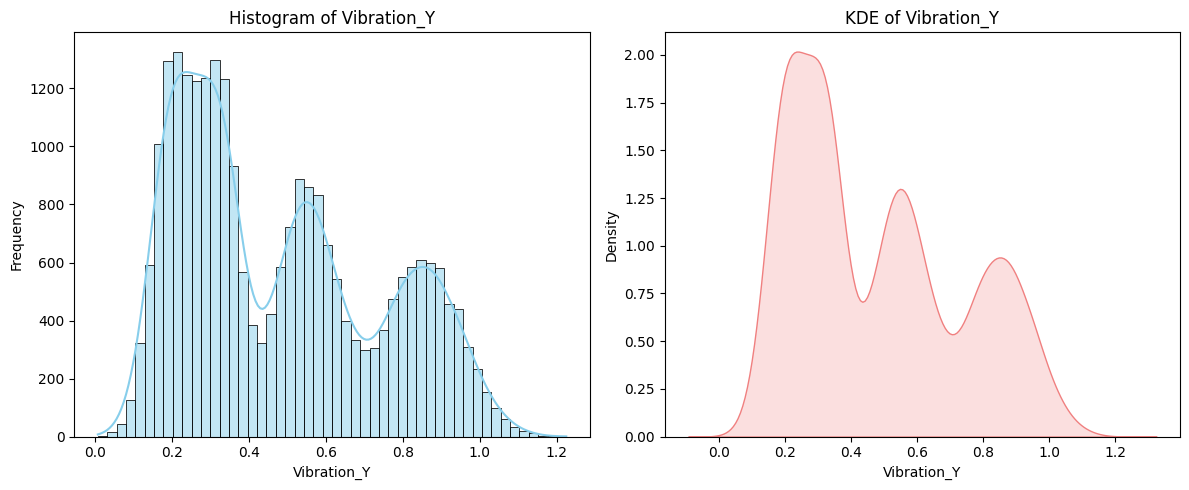

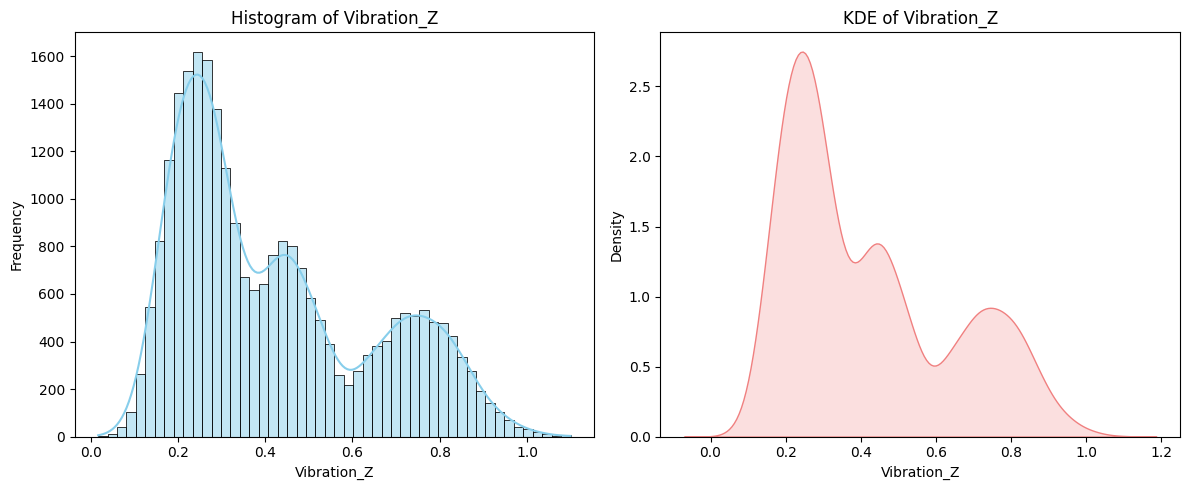

In [ ]:
numerical_cols = data_train.select_dtypes(include=['number']).columns

print("--- Histograms and KDE Plots for Numerical Features in data_train ---")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram subplot
    plt.subplot(1, 2, 1)
    sns.histplot(data_train[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # KDE plot subplot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data_train[col], fill=True, color='lightcoral')
    plt.title(f'KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

## Memeriksa Outlier pada Dataset (Exclude timestamp) menggunakan Boxplot

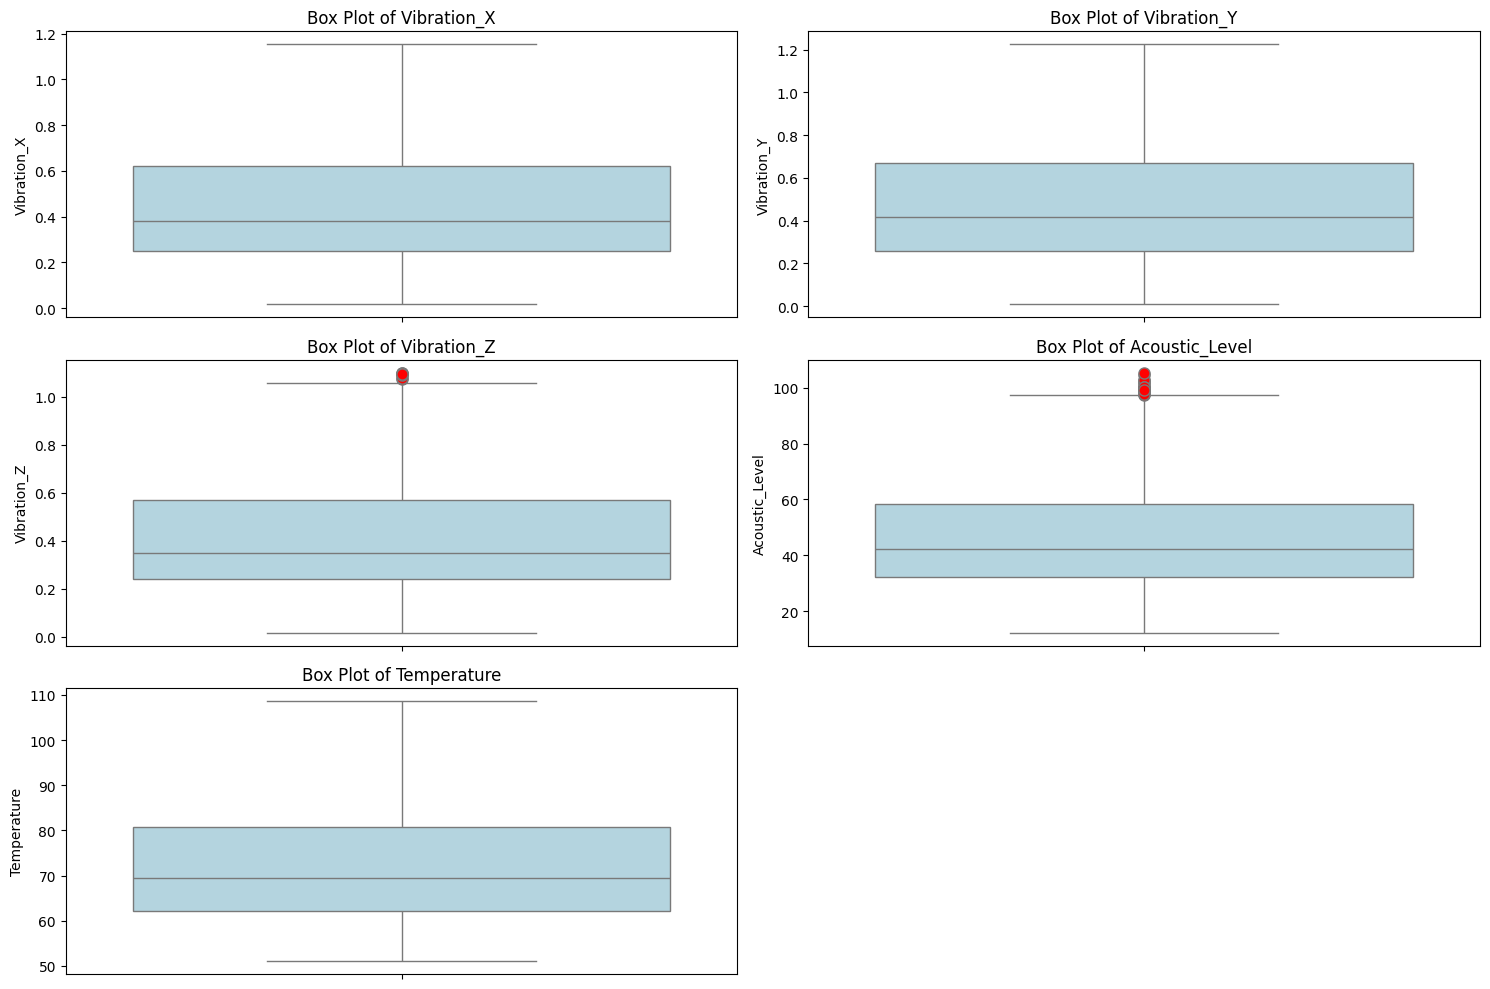

In [ ]:
numerical_cols = data_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + len(numerical_cols) % 2, 2, i + 1)
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    sns.boxplot(y=data_train[col], color='lightblue', flierprops=flierprops)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Feature Corelation

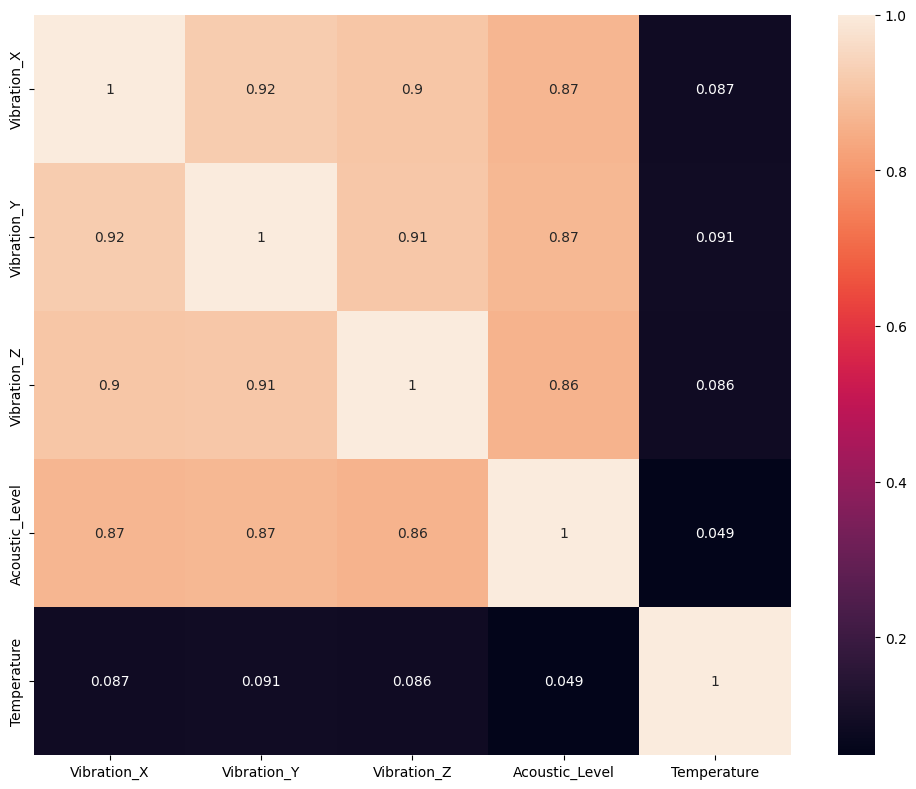

In [ ]:
# Select only numerical columns for correlation matrix
numerical_cols = data_train.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = data_train[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()

## Memeriksa Jumlah Data Tiap Fault Type dibanding Fault Type lainnya


Fault_Type
Overheating      6412
Imbalance        6405
Normal           6398
Bearing Fault    6385
Name: count, dtype: int64

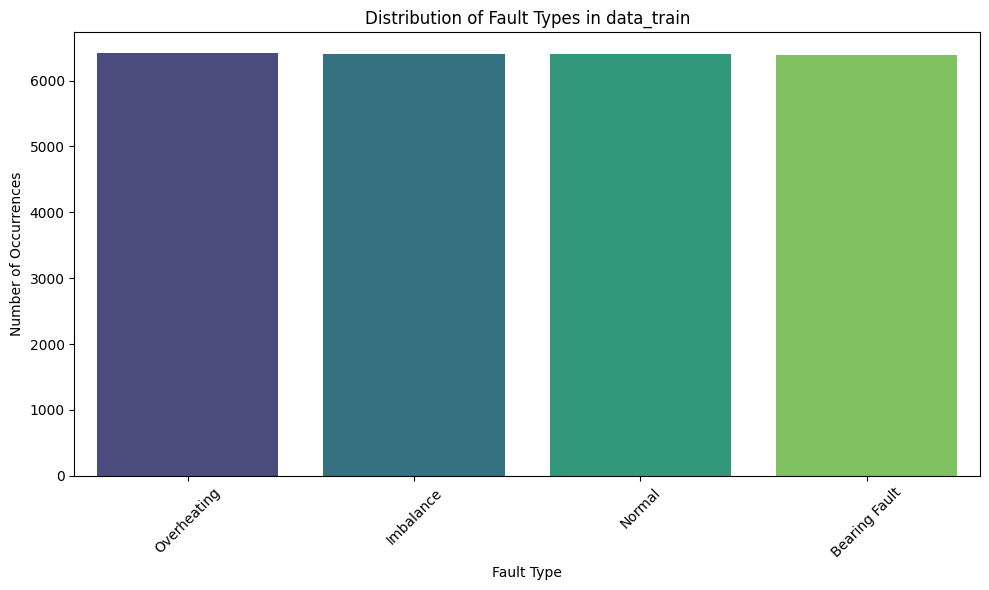

In [ ]:
# Get value counts of the 'Fault_Type' column
fault_type_counts = data_train['Fault_Type'].value_counts()
display(fault_type_counts)

# Visualize the class balance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fault_type_counts.index, y=fault_type_counts.values, hue=fault_type_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Fault Types in data_train')
plt.xlabel('Fault Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pair Plot untuk setiap Feature (Exclude Timestamp) by Fault Type



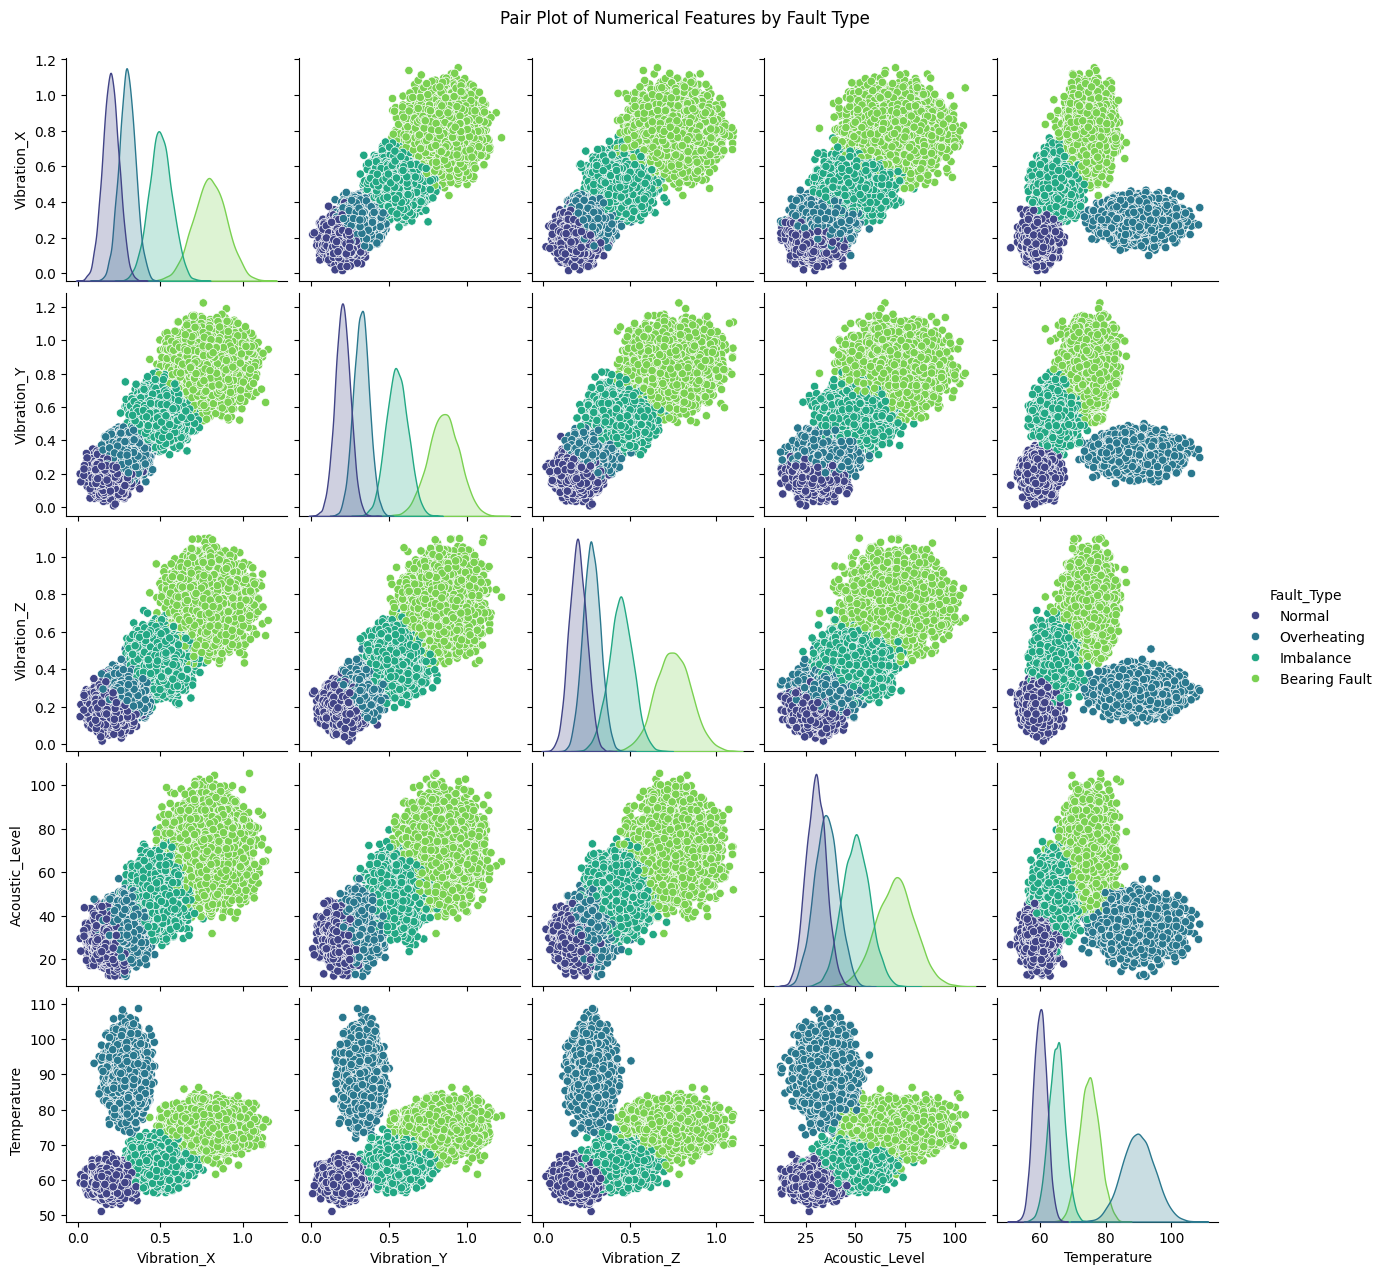

In [ ]:
# Select numerical columns and the 'Fault_Type' for the pair plot
pair_plot_data = data_train.select_dtypes(include=['number']).copy()
pair_plot_data['Fault_Type'] = data_train['Fault_Type']

# Generate the pair plot
sns.pairplot(pair_plot_data, hue='Fault_Type', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Fault Type', y=1.02) # Adjust title position
plt.show()

## Memeriksa distribusi feature (exclude time stamp) untuk setiap fault typenya

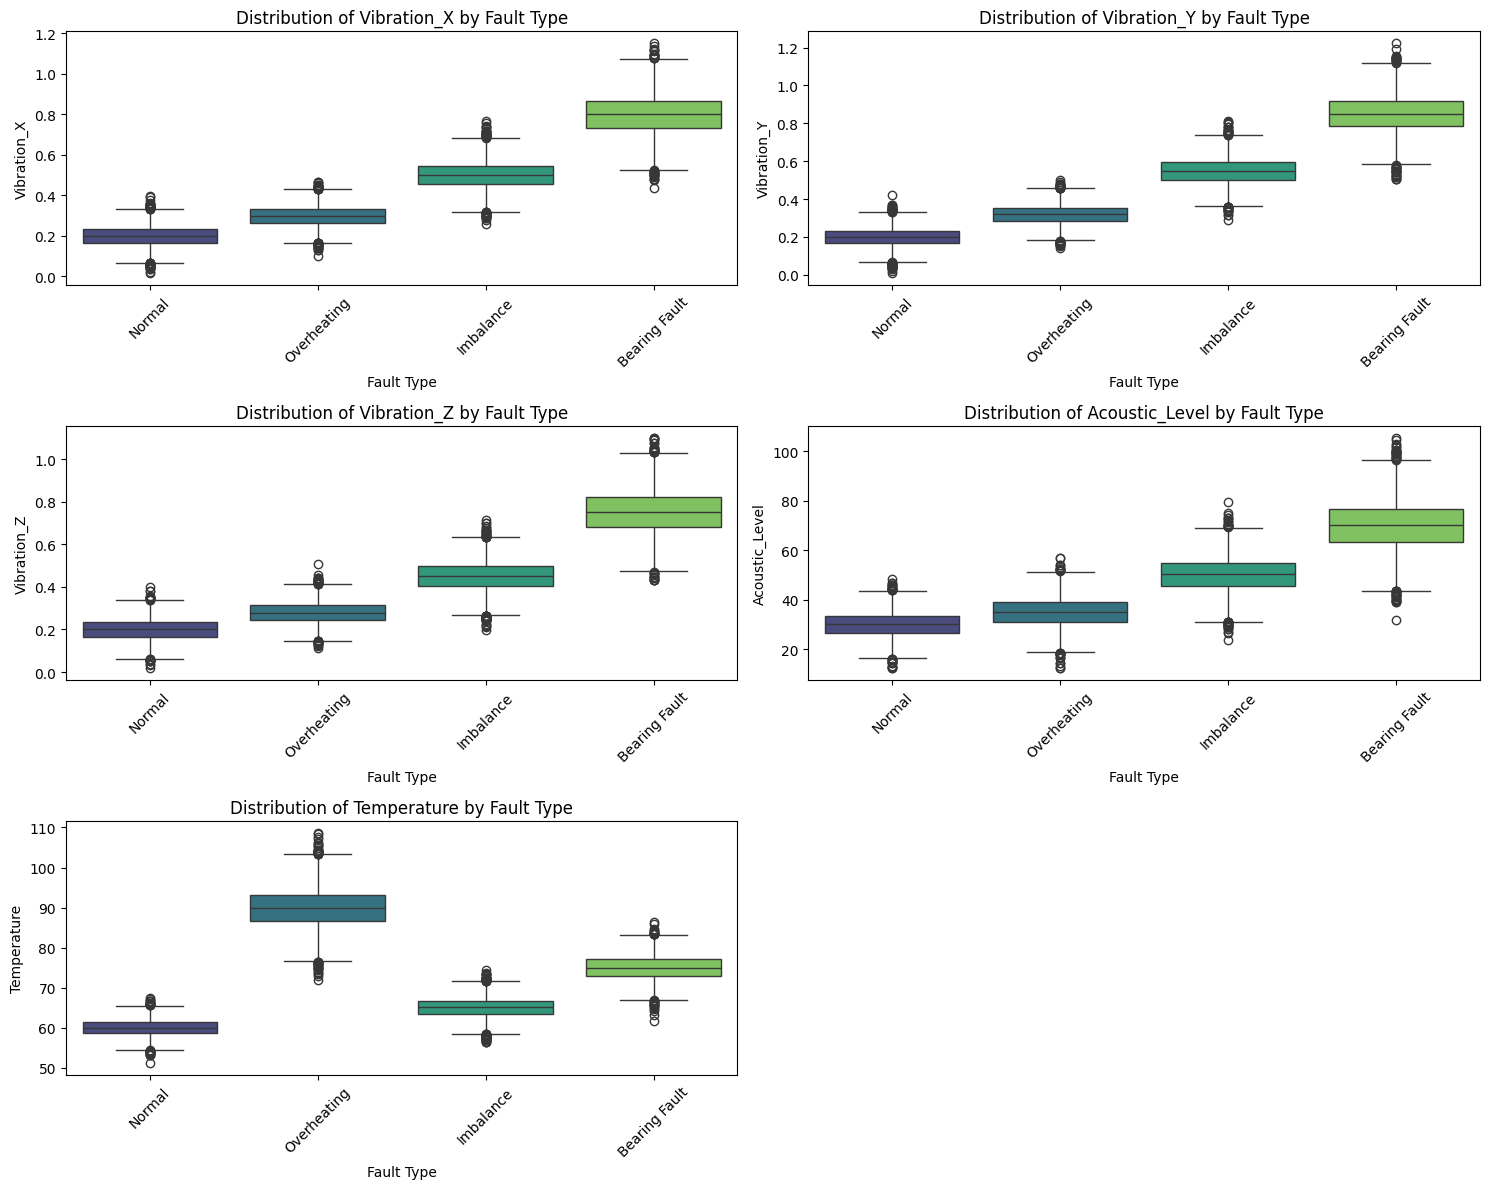

Generated box plots for all numerical features by Fault Type.


In [ ]:
numerical_cols = data_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed, e.g., 3 rows, 2 columns
    sns.boxplot(x='Fault_Type', y=col, data=data_train, palette='viridis', hue='Fault_Type', legend=False)
    plt.title(f'Distribution of {col} by Fault Type')
    plt.xlabel('Fault Type')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Generated box plots for all numerical features by Fault Type.")

## Index Series untuk Semua Feauture


*   Menunjukan bahwa Index original dari data set merupakan random dan tidak terurut
*   Akan dicoba mensort berdasarkan Timestamp, namun Timestamp masih berbentuk Object sehingga harus dirubah dulu ke Datetime





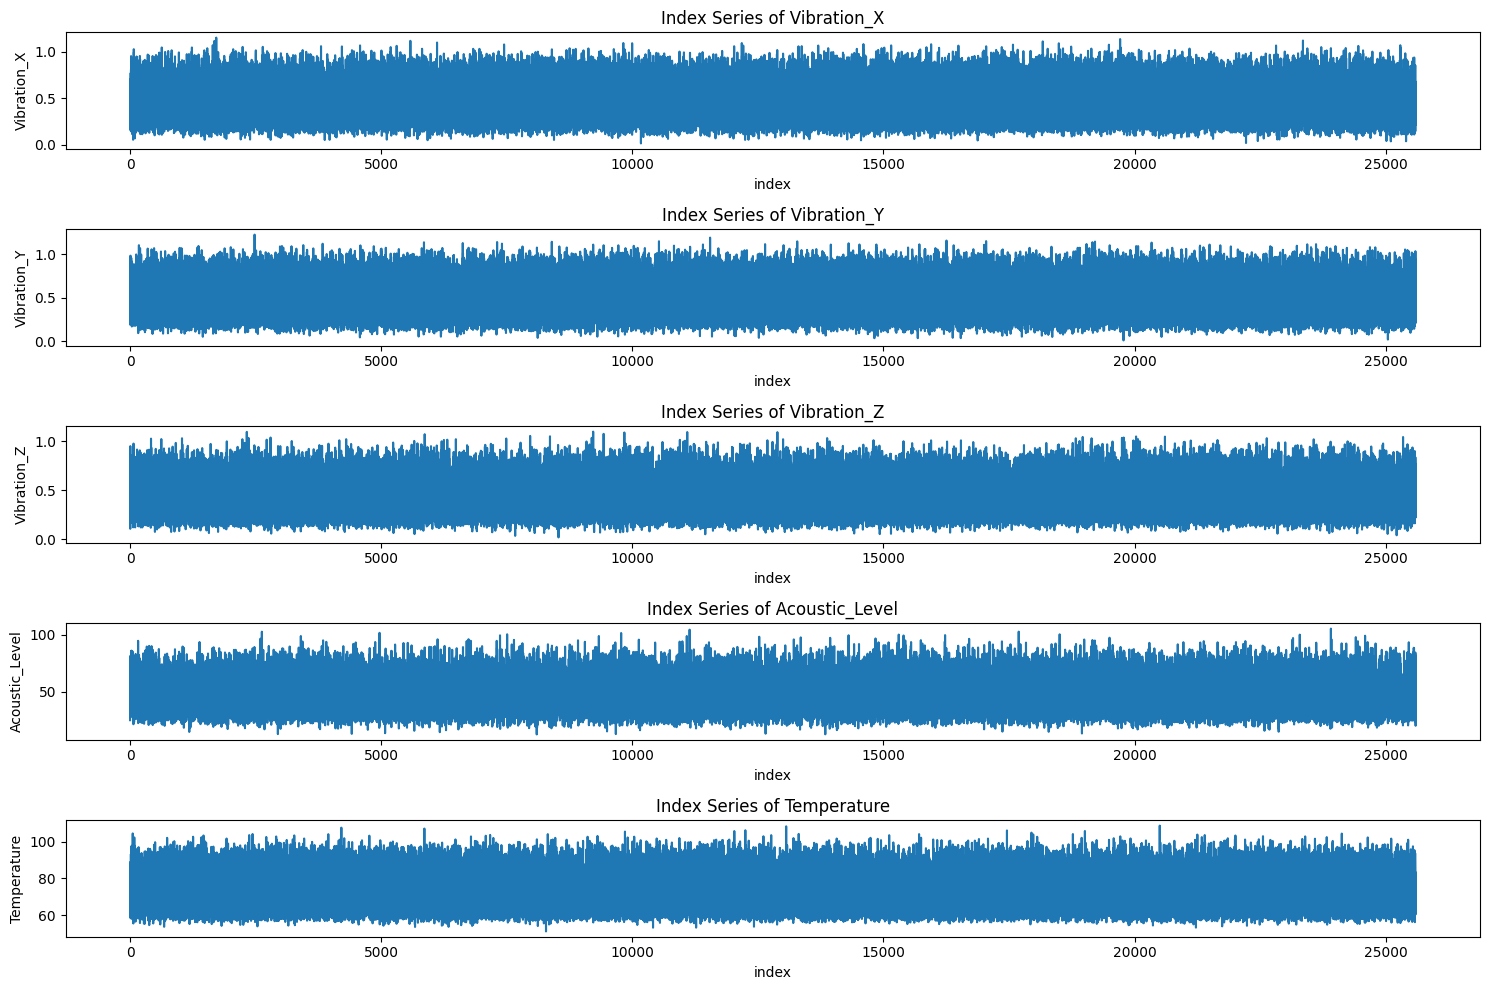

In [ ]:
numerical_cols = data_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1) # Create subplots for better visualization
    sns.lineplot(x=data_train.index, y=data_train[col])
    plt.title(f'Index Series of {col}')
    plt.xlabel('index')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

### Dipisah menjadi setiap fault_typenya

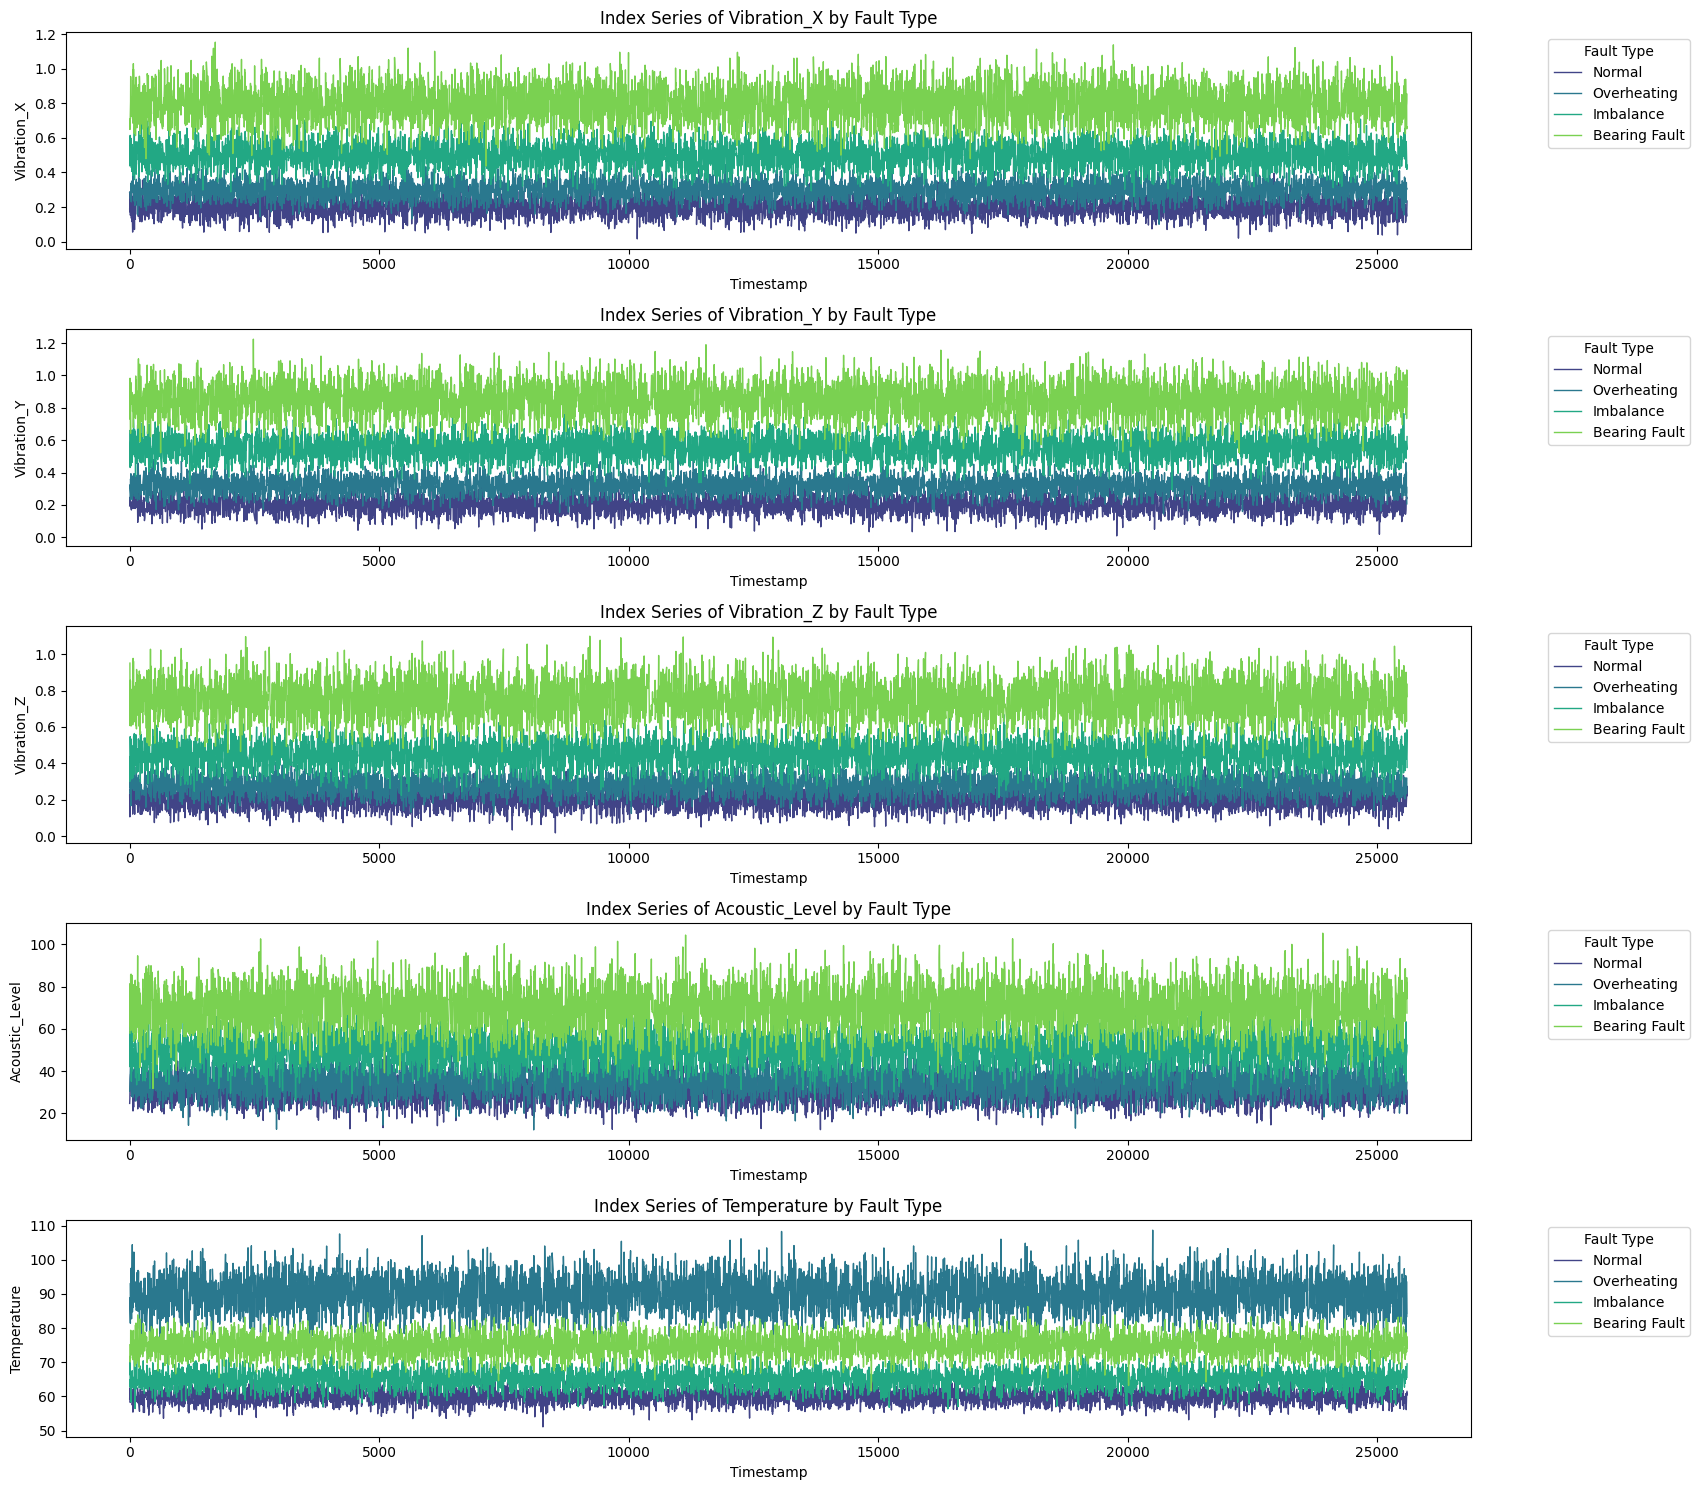

In [ ]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.lineplot(x=data_train.index, y=data_train[col], hue=data_train['Fault_Type'], palette='viridis', lw=1) # Added hue for Fault_Type
    plt.title(f'Index Series of {col} by Fault Type')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Moved legend outside
    plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjusted layout to make space for legend
plt.show()

# Preprocessing

## *No Null Data*


## Outlier


1.   Berdasarkan EDA diatas, Outlier merupakan data yang cukup penting untuk Fault_Type jadi tidak dilakukan Preprocessing apapun untuk Outlier



## Timestamp

1.   Merubah tipe data Timestamp dari Object ke Date Time<br>
2.   Mengubah index dari numbering ke Timestamp<br>
3.   Mengurutkan berdasarkan Timestamp

In [ ]:
data = [data_train, data_solution]
for i, df in enumerate(data):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values(by='Timestamp')
    df = df.set_index('Timestamp')
    data[i] = df
data_train, data_solution = data


data_train.head()

Vibration_X  Vibration_Y  Vibration_Z  Acoustic_Level  \
Timestamp                                                                    
2024-01-01 00:01:00     0.193087     0.174817     0.201965       26.431003   
2024-01-01 00:02:00     0.232384     0.191381     0.154384       37.127030   
2024-01-01 00:03:00     0.276151     0.235737     0.176875       39.322068   
2024-01-01 00:05:00     0.188293     0.228524     0.290923       26.655028   
2024-01-01 00:06:00     0.278961     0.205086     0.175799       35.712614   

                     Temperature Fault_Type  
Timestamp                                    
2024-01-01 00:01:00    56.776869     Normal  
2024-01-01 00:02:00    58.647308     Normal  
2024-01-01 00:03:00    57.263904     Normal  
2024-01-01 00:05:00    57.353311     Normal  
2024-01-01 00:06:00    56.037906     Normal

### Melakukan Time Series plot setelah data diurutkan berdasarkan Timestamp


*   Terlihat data terpisah dengan cukup jelas dengan lonjakan
*   Namun apakah lonjakan ini mencerminkan tiap fault_type?



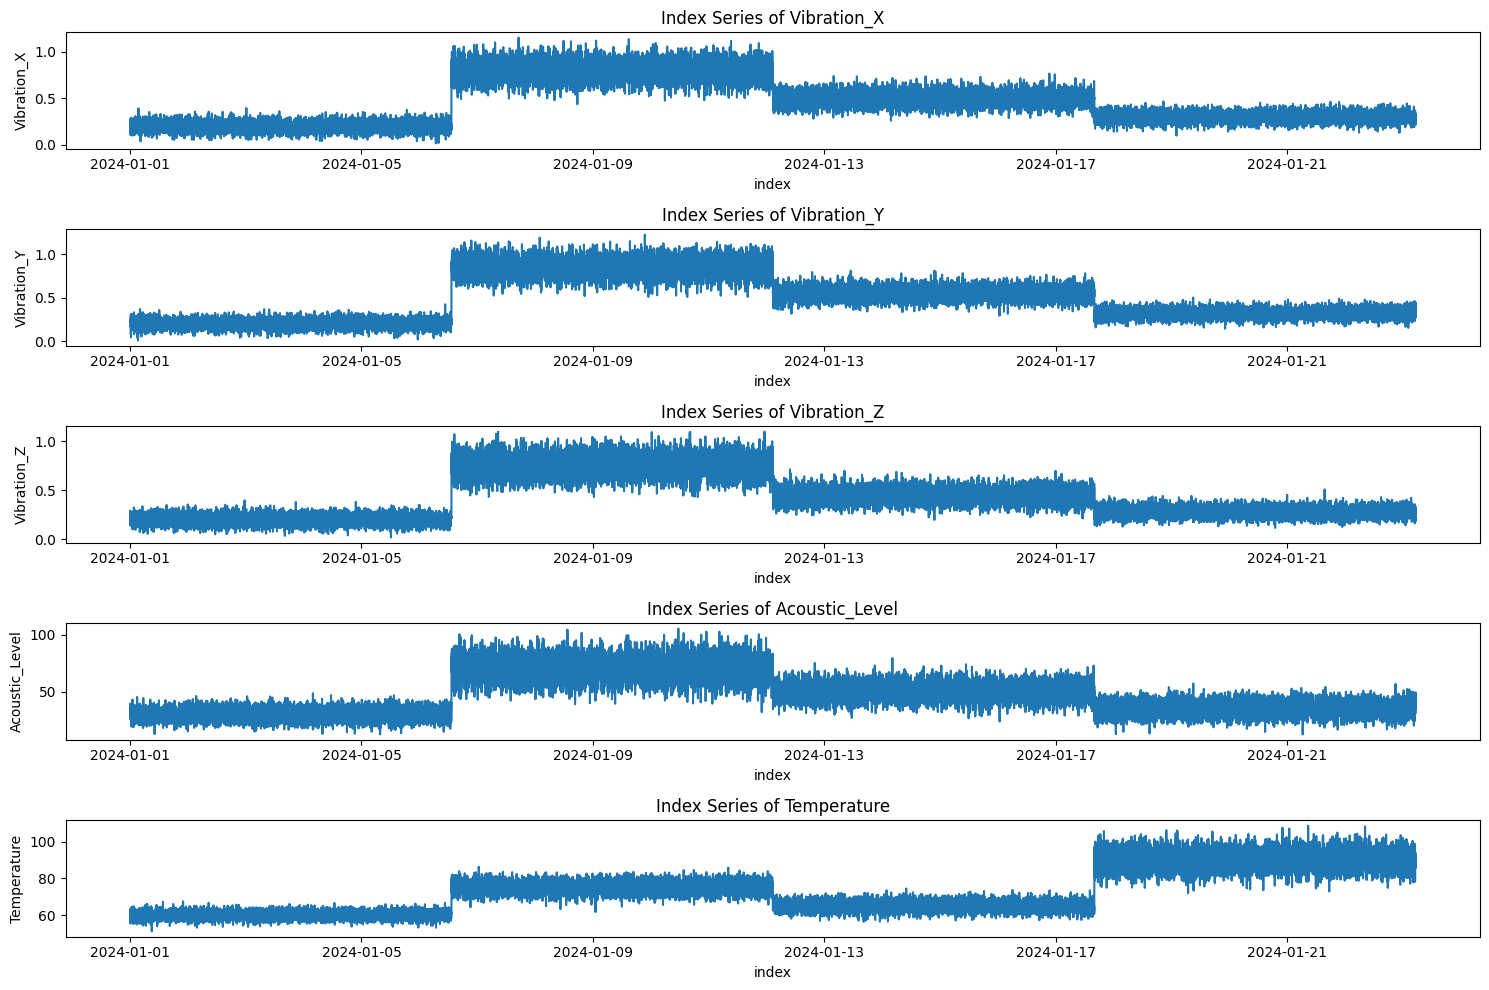

In [ ]:
numerical_cols = data_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1) # Create subplots for better visualization
    sns.lineplot(x=data_train.index, y=data_train[col])
    plt.title(f'Index Series of {col}')
    plt.xlabel('index')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.lineplot(x=data_train.index, y=data_train[col], hue=data_train['Fault_Type'], palette='viridis', lw=1) # Added hue for Fault_Type
    plt.title(f'Index Series of {col} by Fault Type')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Moved legend outside
    plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjusted layout to make space for legend
plt.show()



*   Jawabannya adalah iya
*   Artinya : Setiap fault_type pada dataset_train terjadi pada kurun waktu yang teratur hal ini cukup masuk akal apabila di asumsikan ketika suatu mesin memasuki fault_type contoh nya normal, maka mesin tersebut akan normal hingga terjadi sesuatu yang membuat status normal terganti.
* Artinya : Apabila dilihat dari lonjakan nilai setiap fault_type. Perbedaan kondisi vibrasi, suara, dan panas cukup berbeda dari 1 sama lain (Didukung dengan visualisasi di atas)



## Fault_Type Encoding

1. Mengubah Fault_Type ke Numeric yang melambangkan setiap Fault_Type mengunakan LabelEncoding

In [ ]:
if data_train['Fault_Type'].dtype == 'object':
  label_encoder = LabelEncoder()
  datas = [data_train, data_solution]
  for i, data in enumerate(datas) :
    data['Fault_Type'] = label_encoder.fit_transform(data['Fault_Type'])
    datas[i] = data
  data_train, data_solution = datas
  print("Original Fault_Type and Encoded Fault_Type mapping:")
  for i, type_name in enumerate(label_encoder.classes_):
      print(f"{type_name}: {i}")
else :
  print("Fault_Type is already encoded.")

data_train.head()

Original Fault_Type and Encoded Fault_Type mapping:
Bearing Fault: 0
Imbalance: 1
Normal: 2
Overheating: 3


Vibration_X  Vibration_Y  Vibration_Z  Acoustic_Level  \
Timestamp                                                                    
2024-01-01 00:01:00     0.193087     0.174817     0.201965       26.431003   
2024-01-01 00:02:00     0.232384     0.191381     0.154384       37.127030   
2024-01-01 00:03:00     0.276151     0.235737     0.176875       39.322068   
2024-01-01 00:05:00     0.188293     0.228524     0.290923       26.655028   
2024-01-01 00:06:00     0.278961     0.205086     0.175799       35.712614   

                     Temperature  Fault_Type  
Timestamp                                     
2024-01-01 00:01:00    56.776869           2  
2024-01-01 00:02:00    58.647308           2  
2024-01-01 00:03:00    57.263904           2  
2024-01-01 00:05:00    57.353311           2  
2024-01-01 00:06:00    56.037906           2

# Feature Engineering

## Magnitute Vibration

In [ ]:
datas = [data_train, data_solution]
for i, df_item in enumerate(datas):
    df_item['Vib_Magnitude'] = np.sqrt(
    np.power(df_item['Vibration_X'], 2) +
    np.power(df_item['Vibration_Y'], 2) +
    np.power(df_item['Vibration_Z'], 2))
    datas[i] = df_item
data_train, data_solution = datas
data_train.head()

Vibration_X  Vibration_Y  Vibration_Z  Acoustic_Level  \
Timestamp                                                                    
2024-01-01 00:01:00     0.193087     0.174817     0.201965       26.431003   
2024-01-01 00:02:00     0.232384     0.191381     0.154384       37.127030   
2024-01-01 00:03:00     0.276151     0.235737     0.176875       39.322068   
2024-01-01 00:05:00     0.188293     0.228524     0.290923       26.655028   
2024-01-01 00:06:00     0.278961     0.205086     0.175799       35.712614   

                     Temperature  Fault_Type  Vib_Magnitude  
Timestamp                                                    
2024-01-01 00:01:00    56.776869           2       0.329596  
2024-01-01 00:02:00    58.647308           2       0.338325  
2024-01-01 00:03:00    57.263904           2       0.403876  
2024-01-01 00:05:00    57.353311           2       0.415107  
2024-01-01 00:06:00    56.037906           2       0.388310

## AVG Vibration


1.   Dilihat dari korelasi antar feature dan pairplot, Vibration_X, Vibration_Y, Vibration_Z merupakan feature yang sangat berkorelasi. Hal ini merupakan hal yang wajar karena ketiga feature ini mengandung kurang lebih informasi yang sama, yaitu getaran mesin dan hanya dipisah sesuai axis getarannya
2.   Dapat dilakukan penurunan dari ketiga feature ini menjadi 1 feature yaitu Rata-rata dari ketiga vibrasi ## Coba tetap dimasukan
3. Namun apakah penurunan ini akan memperjelas wilayah klasifikasi ? atau malah menghilangkan informasi penting?



Untuk Menjawab pertanyaan itu akan dibandingkan pairplot antar keduanya<br><br>
Dibawah ini merupakan pairplot untuk data yang belum di AVG

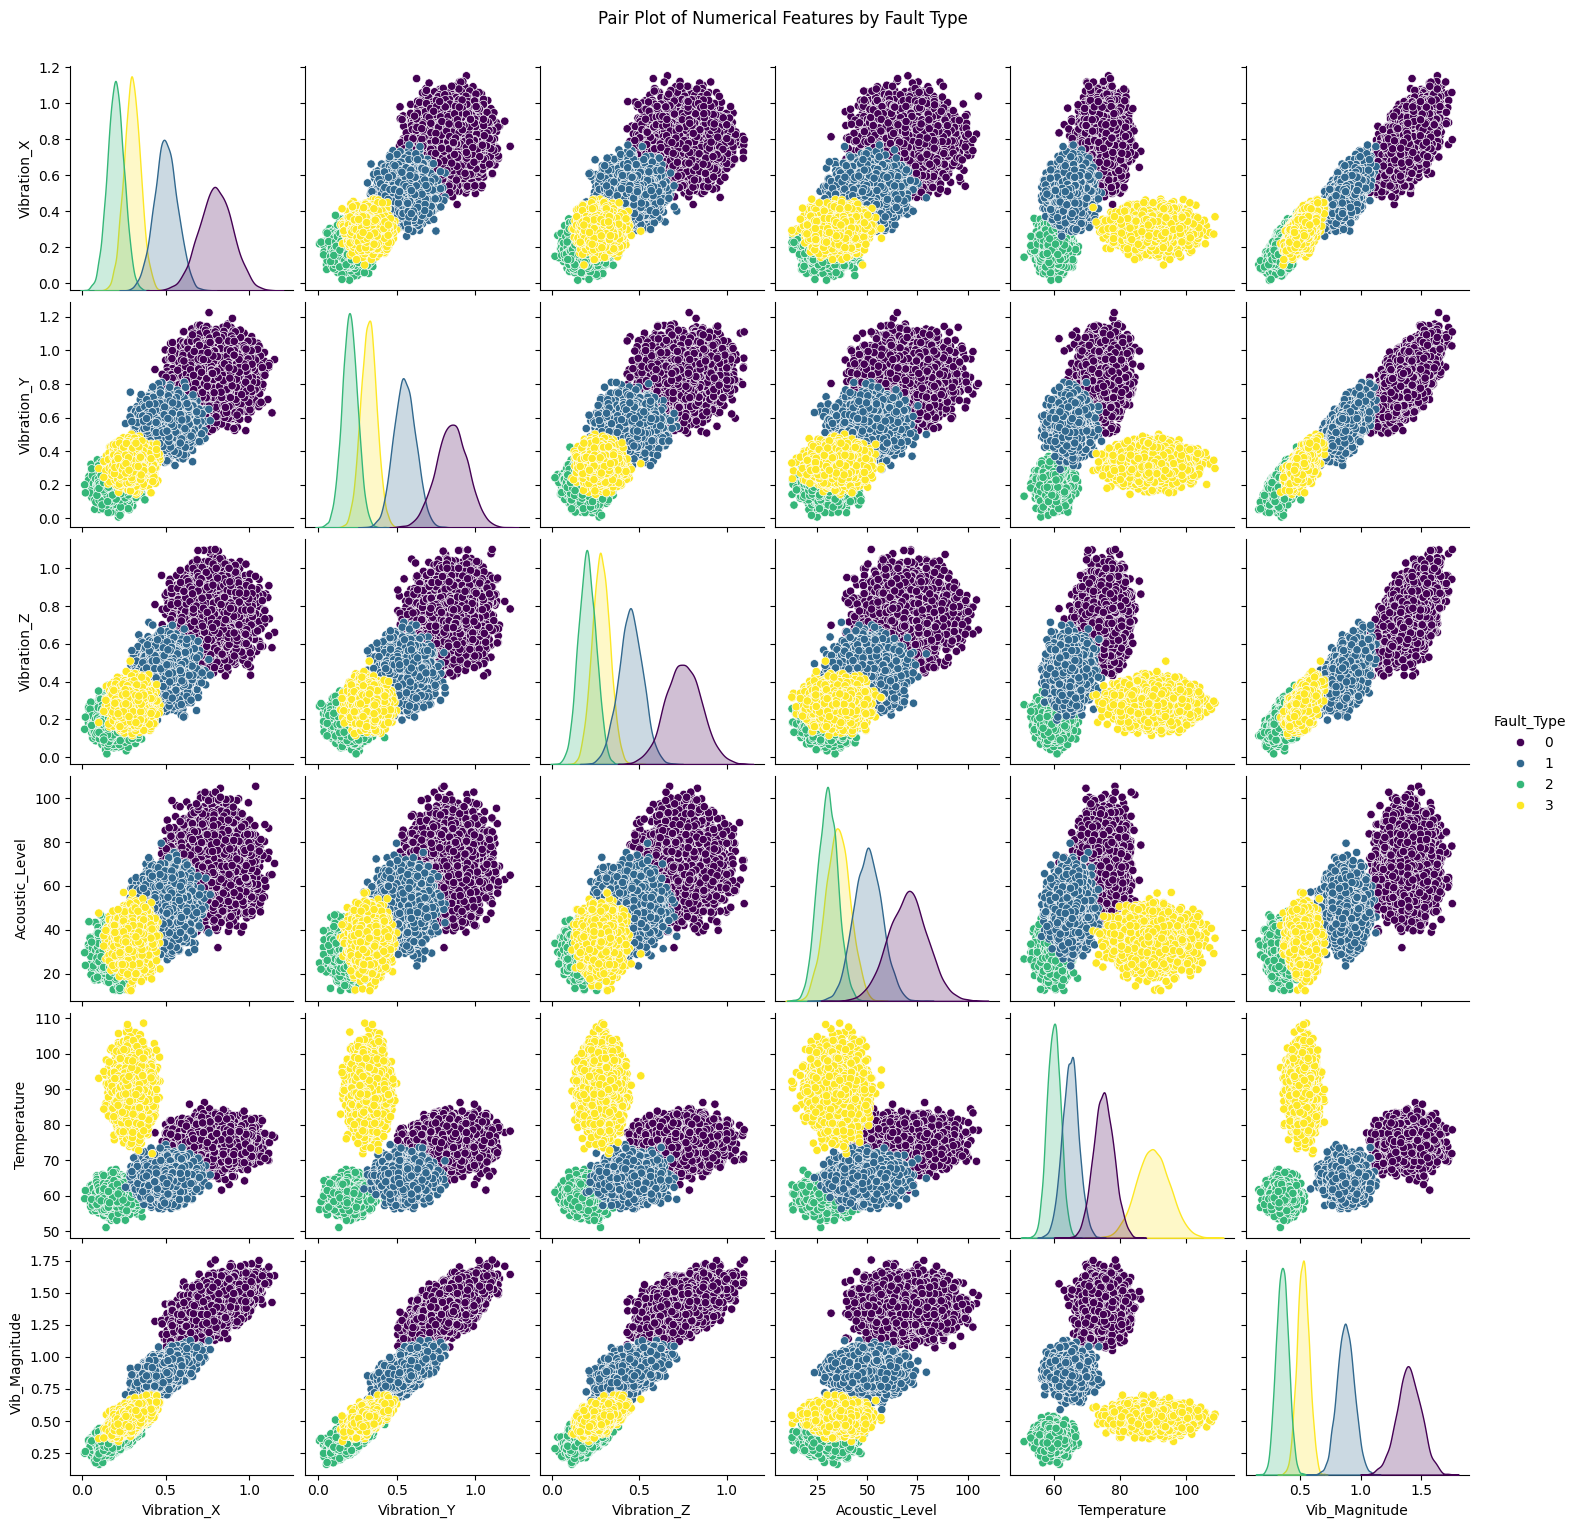

In [ ]:
# Select numerical columns and the 'Fault_Type' for the pair plot
pair_plot_data = data_train.select_dtypes(include=['number']).copy()
pair_plot_data['Fault_Type'] = data_train['Fault_Type']

# Generate the pair plot
sns.pairplot(pair_plot_data, hue='Fault_Type', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Fault Type', y=1.02) # Adjust title position
plt.show()

Kemudian akan dicoba untuk menggabungkan Vibration menjadi vibration AVG

In [ ]:
if 'Avg_Vibration' not in data_train.columns:
  datas = [data_train, data_solution]
  for i, df_item in enumerate(datas) :
    df_item['Avg_Vibration'] = df_item[['Vibration_X', 'Vibration_Y', 'Vibration_Z']].mean(axis=1)
    datas[i] = df_item
  data_train, data_solution = datas
  print("Created 'Avg_Vibration' feature and dropped individual vibration columns.")
else:
  print("'Avg_Vibration' already exists. Skipping feature creation.")

data_train.head()

Created 'Avg_Vibration' feature and dropped individual vibration columns.


Vibration_X  Vibration_Y  Vibration_Z  Acoustic_Level  \
Timestamp                                                                    
2024-01-01 00:01:00     0.193087     0.174817     0.201965       26.431003   
2024-01-01 00:02:00     0.232384     0.191381     0.154384       37.127030   
2024-01-01 00:03:00     0.276151     0.235737     0.176875       39.322068   
2024-01-01 00:05:00     0.188293     0.228524     0.290923       26.655028   
2024-01-01 00:06:00     0.278961     0.205086     0.175799       35.712614   

                     Temperature  Fault_Type  Vib_Magnitude  Avg_Vibration  
Timestamp                                                                   
2024-01-01 00:01:00    56.776869           2       0.329596       0.189957  
2024-01-01 00:02:00    58.647308           2       0.338325       0.192716  
2024-01-01 00:03:00    57.263904           2       0.403876       0.229588  
2024-01-01 00:05:00    57.353311           2       0.415107       0.235914  
2024-01-01 00:06:00    56.037906           2       0.388310       0.219949

Dibawah ini merupakan pairplot untuk data yang sudah di AVG

In [ ]:
# Select numerical columns and the 'Fault_Type' for the pair plot
pair_plot_data = data_train.select_dtypes(include=['number']).copy()
pair_plot_data['Fault_Type'] = data_train['Fault_Type']

# Generate the pair plot
sns.pairplot(pair_plot_data, hue='Fault_Type', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Fault Type', y=1.02) # Adjust title position
plt.show()

## Root Mean Square untuk X,Y,Z Rolling 10

In [ ]:
# if 'RMS_X' not in data_train.columns and 'RMS_Y' not in data_train.columns and 'RMS_Z' not in data_train.columns:
datas = [data_train, data_solution]
for i, df_item in enumerate(datas) :
  df_item['RMS_X'] = df_item['Vibration_X'].pow(2).rolling(10).mean().pow(0.5)
  df_item['RMS_Y'] = df_item['Vibration_Y'].pow(2).rolling(10).mean().pow(0.5)
  df_item['RMS_Z'] = df_item['Vibration_Z'].pow(2).rolling(10).mean().pow(0.5)
  # Bfill
  df_item['RMS_X'] = df_item['RMS_X'].bfill()
  df_item['RMS_Y'] = df_item['RMS_Y'].bfill()
  df_item['RMS_Z'] = df_item['RMS_Z'].bfill()
  datas[i] = df_item

data_train, data_solution = datas
#   print("Created 'RMS' ")
# else:
#   print("'RMS_X,Y,Z' already exists. Skipping feature creation.")

data_train.head()

Vibration_X  Vibration_Y  Vibration_Z  Acoustic_Level  \
Timestamp                                                                    
2024-01-01 00:01:00     0.193087     0.174817     0.201965       26.431003   
2024-01-01 00:02:00     0.232384     0.191381     0.154384       37.127030   
2024-01-01 00:03:00     0.276151     0.235737     0.176875       39.322068   
2024-01-01 00:05:00     0.188293     0.228524     0.290923       26.655028   
2024-01-01 00:06:00     0.278961     0.205086     0.175799       35.712614   

                     Temperature  Fault_Type  Vib_Magnitude  Avg_Vibration  \
Timestamp                                                                    
2024-01-01 00:01:00    56.776869           2       0.329596       0.189957   
2024-01-01 00:02:00    58.647308           2       0.338325       0.192716   
2024-01-01 00:03:00    57.263904           2       0.403876       0.229588   
2024-01-01 00:05:00    57.353311           2       0.415107       0.235914   
2024-01-01 00:06:00    56.037906           2       0.388310       0.219949   

                        RMS_X    RMS_Y     RMS_Z  
Timestamp                                         
2024-01-01 00:01:00  0.217037  0.20871  0.209576  
2024-01-01 00:02:00  0.217037  0.20871  0.209576  
2024-01-01 00:03:00  0.217037  0.20871  0.209576  
2024-01-01 00:05:00  0.217037  0.20871  0.209576  
2024-01-01 00:06:00  0.217037  0.20871  0.209576

## Corelation Feature

In [ ]:
# Select only numerical columns for correlation matrix
numerical_cols = data_train.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = data_train[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()

# Model Training

## Load Data Tain and Test
data_train dan data_solution menjadi X_Train, y_train dan X_test, y_test

In [ ]:
X_train = data_train.drop(columns=['Fault_Type'])
y_train = data_train['Fault_Type']

X_test = data_solution.drop(columns=['Fault_Type'])
y_test = data_solution['Fault_Type']

print("Features (X) and target (y) separated for training and testing.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Features (X) and target (y) separated for training and testing.
X_train shape: (25600, 10)
y_train shape: (25600,)
X_test shape: (6400, 10)
y_test shape: (6400,)


## KNN Model

In [ ]:
# KNN

# Initialize the KNN model with n_neighbors=5
knn_model_solution = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using data_train
knn_model_solution.fit(X_train, y_train)

# Make predictions on X_test from data_solution
y_pred_solution = knn_model_solution.predict(X_test)

# Calculate and print accuracy score using y_test from data_solution
accuracy_solution = accuracy_score(y_test, y_pred_solution)
print(f"Accuracy on data_solution: {accuracy_solution:.2f}")

# Generate and print classification report using y_test from data_solution
print("\nClassification Report on data_solution:")
print(classification_report(y_test, y_pred_solution))
print("KNN model trained on data_train, predictions made and evaluated on data_solution.")

Accuracy on data_solution: 1.00

Classification Report on data_solution:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1615
           1       0.99      0.99      0.99      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400

KNN model trained on data_train, predictions made and evaluated on data_solution.


In [ ]:
# KNN Conf Matrix

# Generate the confusion matrix using y_test from data_solution and y_pred_solution
cm_solution = confusion_matrix(y_test, y_pred_solution)

# Get unique class names for labels
class_names_solution = sorted(y_test.unique())

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_solution, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_solution, yticklabels=class_names_solution)
plt.title('Confusion Matrix on data_solution')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for KNN model predictions on data_solution generated and displayed.")

Confusion matrix for KNN model predictions on data_solution generated and displayed.


## Logistic Regression

Logistic Regression Accuracy: 1.00

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



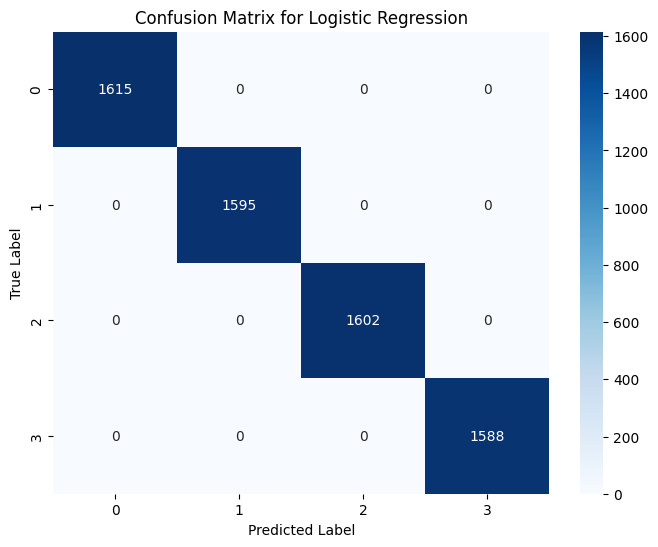

In [ ]:
# Logistic Regression


# 2. Instantiate a Logistic Regression model
# Using max_iter to ensure convergence for some datasets
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 3. Train the Logistic Regression model
lr_model.fit(X_train, y_train)

# 4. Make predictions on X_test
y_pred_lr = lr_model.predict(X_test)

# 5. Calculate the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# 6. Print a classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# 7. Generate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Get unique class names for labels
class_names = sorted(y_test.unique())

# 8. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Extreme Gradient Boosting (XGB)

XGBoost Classifier Accuracy: 1.00

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



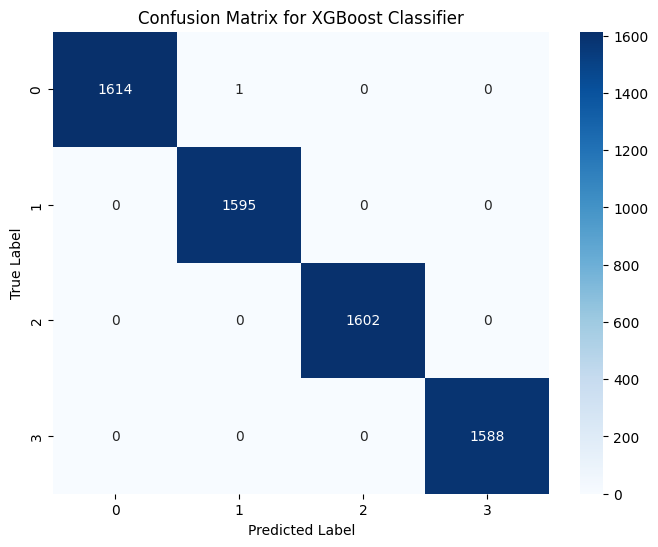

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,       # number of trees
    learning_rate=0.05,     # step size
    max_depth=5,            # tree depth
    subsample=0.8,          # row sample
    colsample_bytree=0.8,   # feature sample
    eval_metric='mlogloss'  # avoids warning
)

# 2. Train the model
xgb_model.fit(X_train, y_train)

# 3. Predict
y_pred_xgb = xgb_model.predict(X_test)

# 4. Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")

# 5. Classification Report
print("\nClassification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# 6. Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

class_names = sorted(y_test.unique())

# 7. Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Light Gradient Boosting Machine (LGBM)

LGBM Classifier Accuracy: 1.00

Classification Report for LGBM Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



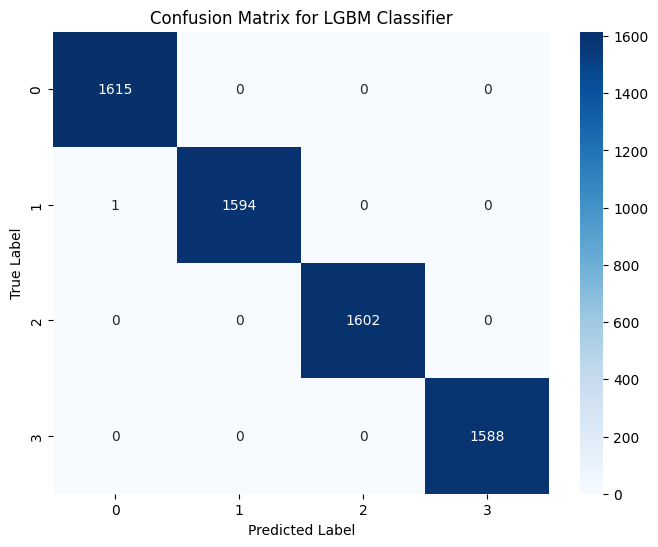

In [ ]:
lgbm_model = LGBMClassifier(
    random_state=42,
    n_estimators=300,      # jumlah trees
    learning_rate=0.05,   # kecepatan belajar
    max_depth=-1,          # default = unlimited depth
    verbosity=-1
)

# 2. Train the model
lgbm_model.fit(X_train, y_train)

# 3. Predict on X_test
y_pred_lgbm = lgbm_model.predict(X_test)

# 4. Calculate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LGBM Classifier Accuracy: {accuracy_lgbm:.2f}")

# 5. Classification report
print("\nClassification Report for LGBM Classifier:")
print(classification_report(y_test, y_pred_lgbm))

# 6. Confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# get class names
class_names = sorted(y_test.unique())

# 7. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for LGBM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## CatBoost

0:	learn: 1.2418876	total: 25ms	remaining: 7.47s
100:	learn: 0.0056778	total: 2.52s	remaining: 4.97s
200:	learn: 0.0003881	total: 4.47s	remaining: 2.2s
299:	learn: 0.0001603	total: 6.43s	remaining: 0us
CatBoost Classifier Accuracy: 1.00

Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



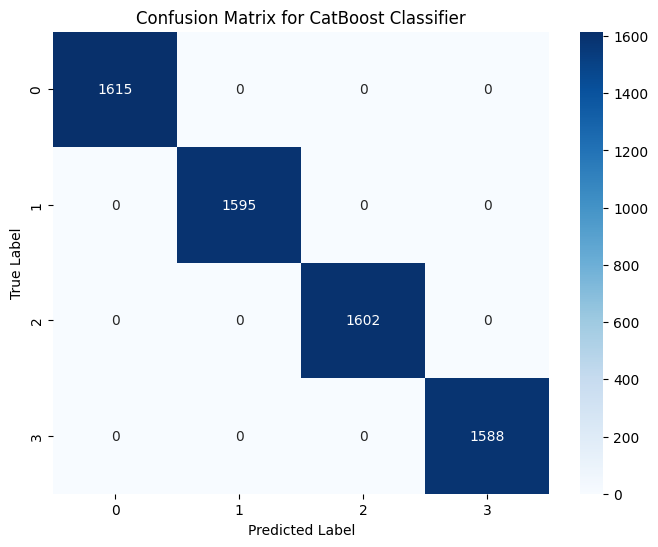

In [ ]:
# 1. Instantiate CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=300,        # jumlah boosting rounds
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    verbose=100,           # tampilkan log per 100 iterasi
    random_seed=42
)

# 2. Train the model
# Jika semua fitur numerik, tidak perlu cat_features
cat_model.fit(X_train, y_train)

# 3. Predict on X_test
y_pred_cat = cat_model.predict(X_test)

# 4. Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Classifier Accuracy: {accuracy_cat:.2f}")

# 5. Classification report
print("\nClassification Report for CatBoost Classifier:")
print(classification_report(y_test, y_pred_cat))

# 6. Confusion matrix
cm_cat = confusion_matrix(y_test, y_pred_cat)

# get class names
class_names = sorted(y_test.unique())

# 7. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest Classifier

Random Forest Classifier Accuracy: 1.00

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



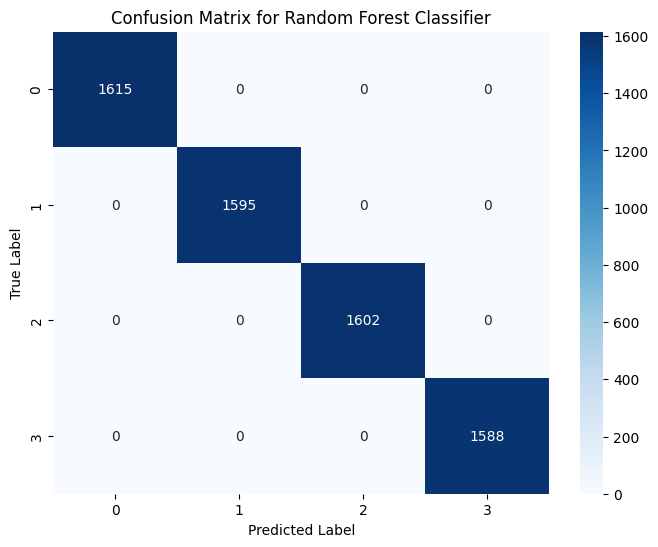

In [ ]:
# Random Forest Classifier

# 2. Instantiate a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# 3. Train the Random Forest model
rf_model.fit(X_train, y_train)

# 4. Make predictions on X_test
y_pred_rf = rf_model.predict(X_test)

# 5. Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

# 6. Print a classification report
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# 7. Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Get unique class names for labels
class_names = sorted(y_test.unique())

# 8. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## SVM

Training SVM model...
SVM model training complete.

Support Vector Machine Accuracy: 1.00

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1615
           1       1.00      1.00      1.00      1595
           2       1.00      1.00      1.00      1602
           3       1.00      1.00      1.00      1588

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



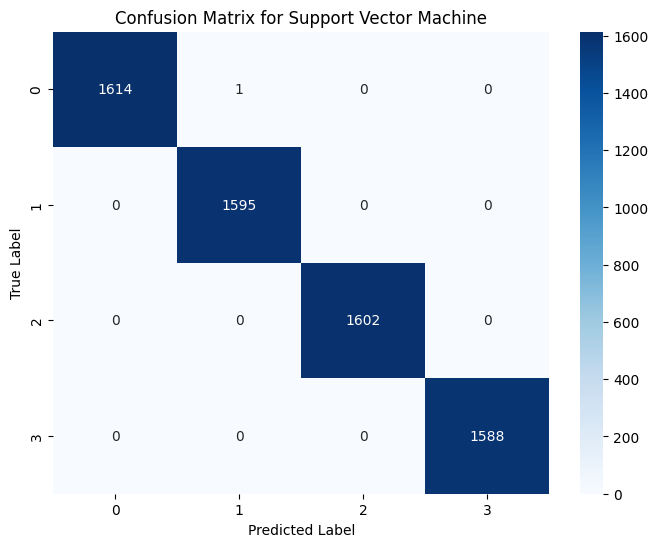

SVM model trained, predictions made, and evaluation metrics displayed.


In [ ]:
# SVC

# 1. Instantiate an SVC model
# Using a linear kernel initially, but rbf is a common alternative
svm_model = SVC(kernel='linear', random_state=42)

# 2. Train the SVM model
print("Training SVM model...")
svm_model.fit(X_train, y_train)
print("SVM model training complete.")

# 3. Make predictions on X_test
y_pred_svm = svm_model.predict(X_test)

# 4. Calculate and print accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSupport Vector Machine Accuracy: {accuracy_svm:.2f}")

# 5. Generate and print classification report
print("\nClassification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

# 6. Generate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Get unique class names for labels (already sorted from previous steps)
class_names = sorted(y_test.unique())

# 7. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("SVM model trained, predictions made, and evaluation metrics displayed.")

# Model Evaluation

In [ ]:
# Model Evaluation

report_knn = classification_report(y_test, y_pred_solution, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)
report_cat = classification_report(y_test, y_pred_cat, output_dict=True)

# Extract relevant metrics
def extract_metrics(report, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-Score': report['macro avg']['f1-score'],
        'Weighted Avg Precision': report['weighted avg']['precision'],
        'Weighted Avg Recall': report['weighted avg']['recall'],
        'Weighted Avg F1-Score': report['weighted avg']['f1-score'],
    }
    return metrics

knn_metrics = extract_metrics(report_knn, 'KNN')
lr_metrics = extract_metrics(report_lr, 'Logistic Regression')
rf_metrics = extract_metrics(report_rf, 'Random Forest')
svm_metrics = extract_metrics(report_svm, 'SVM')
xgb_metrics = extract_metrics(report_xgb, 'XGBoost')
lgbm_metrics = extract_metrics(report_lgbm, 'LightGBM')
cat_metrics = extract_metrics(report_cat, 'CatBoost')

# Create a DataFrame for comparison
performance_df = pd.DataFrame([
    knn_metrics,
    lr_metrics,
    rf_metrics,
    svm_metrics,
    xgb_metrics,
    lgbm_metrics,
    cat_metrics
])

print("Performance metrics extracted and organized into a DataFrame:")
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

Performance metrics extracted and organized into a DataFrame:


Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
1  Logistic Regression  1.000000             1.000000          1.000000   
2        Random Forest  1.000000             1.000000          1.000000   
6             CatBoost  1.000000             1.000000          1.000000   
4              XGBoost  0.999844             0.999843          0.999845   
3                  SVM  0.999844             0.999843          0.999845   
5             LightGBM  0.999844             0.999845          0.999843   
0                  KNN  0.995938             0.995939          0.995949   

   Macro Avg F1-Score  Weighted Avg Precision  Weighted Avg Recall  \
1            1.000000                1.000000             1.000000   
2            1.000000                1.000000             1.000000   
6            1.000000                1.000000             1.000000   
4            0.999844                0.999844             0.999844   
3            0.999844                0.999844             0.999844   
5            0.999844                0.999844             0.999844   
0            0.995943                0.995936             0.995938   

   Weighted Avg F1-Score  
1               1.000000  
2               1.000000  
6               1.000000  
4               0.999844  
3               0.999844  
5               0.999844  
0               0.995936